<a href="https://colab.research.google.com/github/saxena07/Google-Colab-Python/blob/main/Multi%20Modal%20Genre%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**MINOR PROJECT - II**

---


**Multi-Modal Genre Classification for Movies**

---


GROUP MEMBERS :

1.   NAME1 - LAKSHYA SAXENA | 
BATCH - A1 | 
ENROLMENT NO. - 19102026
2.   NAME2 - YASHASVI PUNDEER | 
BATCH - A4 | 
ENROLMENT NO. - 19102106 

---



In [ ]:
!pip install tmdbsimple
!pip install wget
!pip install IMDbPY

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8dfb8e3bae4db207fa881419d52fe762cb6dd34fdc6201a6ee5b9a3fab8e44ed
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 298 kB 5.3 MB/s 


In [ ]:
import urllib
import requests
import json
import imdb
import time
import itertools  
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [ ]:
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

In [ ]:
api_key = '1f2f3d4dbfe6e7814fa8eacd42ce24e4' 

tmdb.API_KEY = api_key 
search = tmdb.Search() 
import os.path


def grab_poster_tmdb(movie):
    
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)

def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [ ]:
print (get_movie_genres_tmdb("The Matrix"))

[{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]


In [ ]:
imbd_object = imdb.IMDb() # by default access the web.

# Search for a movie (get a list of Movie objects).
results = imbd_object.search_movie('The Matrix')

# As this returns a list of all movies containing the word "The Matrix", we pick the first element
movie = results[0]

imbd_object.update(movie)

print ("All the information we can get about this movie from IMDB-",movie.keys())

All the information we can get about this movie from IMDB- ['title', 'kind', 'year', 'cover url', 'localized title', 'cast', 'genres', 'runtimes', 'countries', 'country codes', 'language codes', 'color info', 'aspect ratio', 'sound mix', 'box office', 'certificates', 'original air date', 'rating', 'votes', 'imdbID', 'plot outline', 'languages', 'directors', 'writers', 'producers', 'composers', 'cinematographers', 'editors', 'editorial department', 'casting directors', 'production designers', 'art directors', 'set decorators', 'costume designers', 'make up department', 'production managers', 'assistant directors', 'art department', 'sound department', 'special effects', 'visual effects', 'stunts', 'camera department', 'animation department', 'casting department', 'costume departmen', 'location management', 'music department', 'script department', 'transportation department', 'miscellaneous', 'akas', 'writer', 'director', 'top 250 rank', 'production companies', 'distributors', 'special e

In [ ]:
print ("The genres for The Matrix pulled from IMDB are -",movie['genres'])
print ("The genres for The Matrix pulled from TMDB are -",get_movie_genres_tmdb("The Matrix"))

The genres for The Matrix pulled from IMDB are - ['Action', 'Sci-Fi']
The genres for The Matrix pulled from TMDB are - [{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]


In [ ]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.movie_list()['genres']

In [ ]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()
len(top_movies['results'])
top20_movs=top_movies['results']

In [ ]:
all_movies=tmdb.Movies()
top1000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.popular(page=i)['results']
    top1000_movies.extend(movies_on_this_page)
len(top1000_movies)
f3=open('movie_list.pckl','wb')
pickle.dump(top1000_movies,f3)
f3.close()
print('Done!')

Pulling movie list, Please wait...
Done!


In [ ]:
f3=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f3)
f3.close()

In [ ]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [ ]:
def list2pairs(l):
    pairs = list(itertools.combinations(l, 2))
    for i in l:
        pairs.append([i,i])
    return pairs

In [ ]:
allPairs = []
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

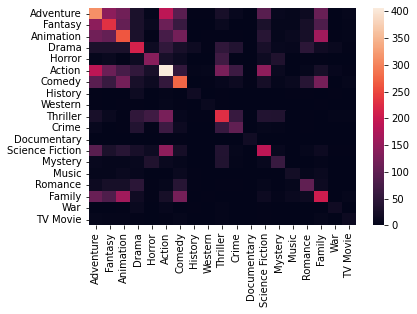

In [ ]:
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

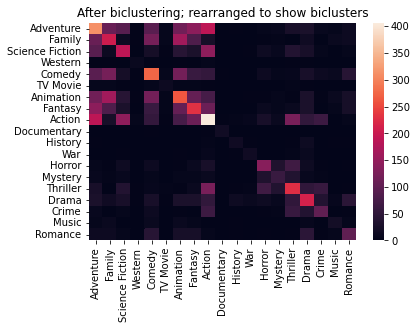

In [ ]:
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)
fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]
annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

In [ ]:
movies = []
baseyear = 2017

print('Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
done_ids=[]
for g_id in nr_ids:
    #print('Pulling movies for genre ID '+g_id)
    baseyear -= 1
    for page in range(1,6,1):
        time.sleep(0.5)
    
        url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + api_key
        url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear) 
        url += '&with_genres=' + str(g_id) + '&page=' + str(page)

        data = urllib.request.urlopen(url).read()

        dataDict = json.loads(data)
        
        movies.extend(dataDict["results"])
    done_ids.append(str(g_id))
print("Pulled movies for genres - "+','.join(done_ids))

Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...
Pulled movies for genres - 12,14,16,18,27,28,35,36,37,53,80,99,878,9648,10402,10749,10751,10752,10770


In [ ]:
f6=open("movies_for_posters",'wb')
pickle.dump(movies,f6)
f6.close()

In [ ]:
f6=open("movies_for_posters",'rb')
movies=pickle.load(f6)
f6.close()

In [ ]:
movie_ids = [m['id'] for m in movies]
print ("originally we had ",len(movie_ids)," movies")
movie_ids=np.unique(movie_ids)
print (len(movie_ids))
seen_before=[]
no_duplicate_movies=[]
for i in range(len(movies)):
    movie=movies[i]
    id=movie['id']
    if id in seen_before:
        continue

        print ("Seen before")
    else:
        seen_before.append(id)
        no_duplicate_movies.append(movie)
print("After removing duplicates we have ",len(no_duplicate_movies), " movies")

originally we had  1834  movies
1697
After removing duplicates we have  1697  movies


In [ ]:
poster_movies=[]
counter=0
movies_no_poster=[]
print("Total movies : ",len(movies))
print("Started downloading posters...")
for movie in movies:
    id=movie['id']
    title=movie['title']
    if counter==1:
        print('Downloaded first. Code is working fine. Please wait, this will take quite some time...')
    if counter%300==0 and counter!=0:
        print ("Done with ",counter," movies!")
        print("Trying to get poster for ",title)
    try:
        grab_poster_tmdb(title)
        poster_movies.append(movie)
    except:
        try:
            time.sleep(7)
            grab_poster_tmdb(title)
            poster_movies.append(movie)
        except:
            movies_no_poster.append(movie)
    counter+=1
print("Done with all the posters!")

Total movies :  1834
Started downloading posters...
Downloaded first. Code is working fine. Please wait, this will take quite some time...
Done with  300  movies!
Trying to get poster for  Top Gun
Done with  600  movies!
Trying to get poster for  Toy Story
Done with  900  movies!
Trying to get poster for  The Departed
Done with  1200  movies!
Trying to get poster for  Paycheck
Done with  1500  movies!
Trying to get poster for  Coyote Ugly
Done with  1800  movies!
Trying to get poster for  The Staircase
Done with all the posters!


In [ ]:
f=open('poster_movies.pckl','wb')
pickle.dump(poster_movies,f)
f.close()

In [ ]:
f=open('poster_movies.pckl','rb')
poster_movies=pickle.load(f)
f.close()

In [ ]:
f=open('no_poster_movies.pckl','wb')
pickle.dump(movies_no_poster,f)
f.close()

In [ ]:
f=open('no_poster_movies.pckl','rb')
movies_no_poster=pickle.load(f)
f.close()

In [ ]:
movies_with_overviews=[]
for i in range(len(no_duplicate_movies)):
    movie=no_duplicate_movies[i]
    id=movie['id']
    overview=movie['overview']
    
    if len(overview)==0:
        continue
    else:
        movies_with_overviews.append(movie)
        
len(movies_with_overviews)

1685

In [ ]:
genres=[]
all_ids=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    genre_ids=movie['genre_ids']
    genres.append(genre_ids)
    all_ids.extend(genre_ids)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)

In [ ]:
genres=tmdb.Genres()

list_of_genres=genres.movie_list()['genres']
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [ ]:
Genre_ID_to_name[10769]="Foreign"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [ ]:
content=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    overview=movie['overview']
    overview=overview.replace(',','')
    overview=overview.replace('.','')
    content.append(overview)

In [ ]:
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(content)

In [ ]:
import pickle
f4=open('X.pckl','wb')
f5=open('Y.pckl','wb')
pickle.dump(X,f4)
pickle.dump(Y,f5)
f6=open('Genredict.pckl','wb')
pickle.dump(Genre_ID_to_name,f6)
f4.close()
f5.close()
f6.close()

TF IDF Transformer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(1685, 1198)

In [ ]:
msk = np.random.rand(X_tfidf.shape[0]) < 0.8

In [ ]:
X_train_tfidf=X_tfidf[msk]
X_test_tfidf=X_tfidf[~msk]
Y_train=Y[msk]
Y_test=Y[~msk]
positions=range(len(movies_with_overviews))
# print positions
test_movies=np.asarray(positions)[~msk]
# test_movies

SVC

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [ ]:
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1.0]}
gridCV = GridSearchCV(SVC(class_weight='balanced'), parameters, scoring=make_scorer(f1_score, average='micro'))
classif = OneVsRestClassifier(gridCV)
classif.fit(X_train_tfidf, Y_train)

OneVsRestClassifier(estimator=GridSearchCV(estimator=SVC(class_weight='balanced'),
                                           param_grid={'C': [0.01, 0.1, 1.0],
                                                       'kernel': ['linear']},
                                           scoring=make_scorer(f1_score, average=micro)))

CONFUSION MATRIX FOR SVC

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(np.argmax(predstfidf, axis=1), np.argmax(Y_test, axis=1))

print(cf_matrix)

[[ 1  0  0  2  2  1  1  1  0  0  1  0  0  0  0  0]
 [25 15  7  9  1  3  0  0  0  2  1  0  0  0  0  0]
 [11  3  6  8  2  0  6  0  0  0  3  0  0  0  1  0]
 [19  5  9 64  7  7  3  2  2  3  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  2  1 10  7  7  1  0  0  1  0  0  0  0  0  0]
 [ 5  0  0  5  2  1  6  0  0  1  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  4  2  1  0  1  0  2  0  0  0  0  0  0]
 [ 1  0  1  1  1  0  0  1  0  0  7  0  2  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


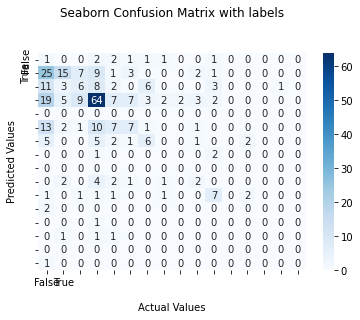

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
predstfidf=classif.predict(X_test_tfidf)
print (classification_report(Y_test, predstfidf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.46      0.53      0.49        55
           2       0.44      0.49      0.47        61
           3       0.52      0.64      0.57       120
           4       0.00      0.00      0.00        40
           5       0.55      0.70      0.62        98
           6       0.41      0.48      0.44        87
           7       0.32      0.34      0.33        35
           8       0.50      0.36      0.42        11
           9       0.50      0.63      0.56        73
          10       0.58      0.60      0.59        48
          11       0.62      0.78      0.69        23
          12       0.54      0.51      0.52        57
          13       0.36      0.43      0.39        30
          14       0.74      0.55      0.63        31
          15       0.48      0.43      0.45        47
          16       0.00      0.00      0.00        70
          17       0.56    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [ ]:
predictions=[]
for i in range(X_test_tfidf.shape[0]):
    pred_genres=[]
    movie_label_scores=predstfidf[i]
#     print movie_label_scores
    for j in range(19):
        #print j
        if movie_label_scores[j]!=0:
            genre=Genre_ID_to_name[genre_list[j]]
            pred_genres.append(genre)
    predictions.append(pred_genres)

In [ ]:
import pickle
f=open('classifer_svc','wb')
pickle.dump(classif,f)
f.close()

PREDICTIONS BY SVC

In [ ]:
for i in range(X_test_tfidf.shape[0]):
    if i%50==0 and i!=0:
        print('MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictions[i]))

MOVIE:  Alice Through the Looking Glass 	PREDICTION:  Fantasy,Animation,Action,Science Fiction
MOVIE:  Coraline 	PREDICTION:  Drama,History,Science Fiction,Foreign
MOVIE:  Pom Poko 	PREDICTION:  Drama,Western
MOVIE:  Despicable Me 2 	PREDICTION:  
MOVIE:  Buddha 2: The Endless Journey 	PREDICTION:  Animation,Drama
MOVIE:  White House Down 	PREDICTION:  Comedy


NAIVE BAYES APPROACH

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifnb = OneVsRestClassifier(MultinomialNB())
classifnb.fit(X[msk].toarray(), Y_train)
predsnb=classifnb.predict(X[~msk].toarray())

CONFUSION MATRIX FOR NAIVE BAYES

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix1 = confusion_matrix(np.argmax(predsnb, axis=1), np.argmax(Y_test, axis=1))

print(cf_matrix1)

[[35 15  7 18  6  3  3  2  0  1  0  3  0  0  0  0  0]
 [10  5  4  4  0  2  2  0  0  1  0  0  0  0  0  0  0]
 [ 4  1  1  3  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [11  3  6 58  4  7  2  1  2  3  0  2  0  0  0  1  0]
 [ 2  3  0  1  7  1  1  0  0  1  0  0  0  0  0  0  0]
 [10  0  1 11  3  5  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  2  4  1  1  5  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  1  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  3  2  2  0  0  1  0  0  0  9  0  4  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]]


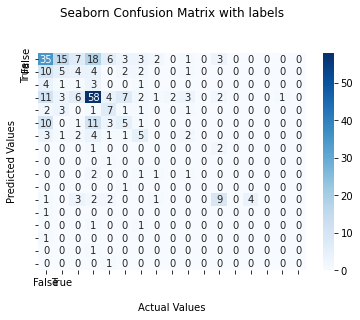

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix1, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import pickle
f2=open('classifer_nb','wb')
pickle.dump(classifnb,f2)
f2.close()

In [ ]:
predictionsnb=[]
for i in range(X_test_tfidf.shape[0]):
    pred_genres=[]
    movie_label_scores=predsnb[i]
    for j in range(19):
        #print j
        if movie_label_scores[j]!=0:
            genre=Genre_ID_to_name[genre_list[j]]
            pred_genres.append(genre)
    predictionsnb.append(pred_genres)

PREDICTIONS BY NAIVE BAYES


In [ ]:
for i in range(X_test_tfidf.shape[0]):
    if i%50==0 and i!=0:
        print ('MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictionsnb[i]))

MOVIE:  Alice Through the Looking Glass 	PREDICTION:  Adventure,Fantasy,Animation,Action,Family
MOVIE:  Coraline 	PREDICTION:  Drama,Action,History,Science Fiction
MOVIE:  Pom Poko 	PREDICTION:  
MOVIE:  Despicable Me 2 	PREDICTION:  
MOVIE:  Buddha 2: The Endless Journey 	PREDICTION:  Drama,Documentary
MOVIE:  White House Down 	PREDICTION:  Comedy


In [ ]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

PRECISION AND RECALL FOR SVC

In [ ]:
precs=[]
recs=[]
for i in range(len(test_movies)):
    if i%1==0:
        pos=test_movies[i]
        test_movie=movies_with_overviews[pos]
        gtids=test_movie['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictions[i])
        precs.append(a)
        recs.append(b)
print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.47815920398009953 0.4584008528784647


PRECISION AND RECALL FOR NAIVE BAYES

In [ ]:
precs=[]
recs=[]
for i in range(len(test_movies)):
    if i%1==0:
        pos=test_movies[i]
        test_movie=movies_with_overviews[pos]
        gtids=test_movie['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictionsnb[i])
        precs.append(a)
        recs.append(b)
print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.4997441364605544 0.5195806680881307


In [ ]:
f=open('poster_movies.pckl','rb')
poster_movies=pickle.load(f)
f.close()

VGG 16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
allnames=os.listdir(poster_folder)
imnames=[j for j in allnames if j.endswith('.jpg')]
feature_list=[]
genre_list=[]
file_order=[]
print("Starting extracting VGG features for scraped images. This will take time, Please be patient...")
print ("Total images = ",len(imnames))
failed_files=[]
succesful_files=[]
i=0
for mov in poster_movies:
    i+=1
    mov_name=mov['original_title']
    mov_name1=mov_name.replace(':','/')
    poster_name=mov_name.replace(' ','_')+'.jpg'
    #print(poster_name)
    if poster_name in imnames:
        img_path=poster_folder+poster_name
        try:
          img = image.load_img(img_path, target_size=(224, 224))
          succesful_files.append(poster_name)
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)
          x = preprocess_input(x)
          features = model.predict(x)
          print (features.shape)
          print (model.predict(x))
          file_order.append(img_path)
          feature_list.append(features)
          genre_list.append(mov['genre_ids'])
          if np.max(np.asarray(feature_list))==0.0:
            print('problematic',i)
          if i%250==0 or i==1:
            print ("Working on Image : ",i)
        except:
            failed_files.append(poster_name)
            
            continue
        
    else:
        continue
print ("Done with all features, please pickle for future use!")

In [ ]:
print (type(feature_list[0]))
feature_list[0].shape

<class 'numpy.ndarray'>


(1, 7, 7, 512)

In [ ]:
list_pickled=(feature_list,file_order,failed_files,succesful_files,genre_list)
f=open('posters_new_features.pckl','wb')
pickle.dump(list_pickled,f)
f.close()
print("Features dumped to pickle file")

Features dumped to pickle file


In [ ]:
f7=open('posters_new_features.pckl','rb')
list_pickled=pickle.load(f7)
f7.close()

In [ ]:
(feature_list,files,failed,succesful,genre_list)=list_pickled

In [ ]:
(a,b,c,d)=feature_list[0].shape
feature_size=a*b*c*d
feature_size

25088

In [ ]:
np_features=np.zeros((len(feature_list),feature_size))
for i in range(len(feature_list)):
    feat=feature_list[i]
    reshaped_feat=feat.reshape(1,-1)
    np_features[i]=reshaped_feat

In [ ]:
X=np_features

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genre_list)

In [ ]:
visual_problem_data=(X,Y)
f8=open('visual_problem_data_clean.pckl','wb')
pickle.dump(visual_problem_data,f8)
f8.close()

In [ ]:
f8=open('visual_problem_data_clean.pckl','rb')
visual_features=pickle.load(f8)
f8.close()

In [ ]:
(X,Y)=visual_features

In [ ]:
X.shape

(1552, 25088)

In [ ]:
mask = np.random.rand(len(X)) < 0.8

In [ ]:
X_train=X[mask]
X_test=X[~mask]
Y_train=Y[mask]
Y_test=Y[~mask]

In [ ]:
X_test.shape
Y_test.shape

(323, 19)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dropout

model_visual = Sequential([
    Dense(4096, input_shape=(25088,)),
    Activation('relu'),
    Dropout (0.25),
    Dense (2048),
    Activation ('relu'),
    Dropout (0.25),
    Dense (1024),
    Activation ('relu'),
    Dropout (0.25),
    Dense(256),
    Activation('relu'),
    Dropout (0.25),
    Dense(19),
    Activation('sigmoid'),
])


model_visual.compile(
    optimizer=optimizers.Adam(),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

model_visual.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 4096)              102764544 
                                                                 
 activation_66 (Activation)  (None, 4096)              0         
                                                                 
 dropout_44 (Dropout)        (None, 4096)              0         
                                                                 
 dense_67 (Dense)            (None, 2048)              8390656   
                                                                 
 activation_67 (Activation)  (None, 2048)              0         
                                                                 
 dropout_45 (Dropout)        (None, 2048)              0         
                                                                 
 dense_68 (Dense)            (None, 1024)            

In [ ]:
history = model_visual.fit(X_train, Y_train, epochs=30, batch_size=512,verbose=1)

Epoch 1/30
3/3 [==============================] - 1s 88ms/step - loss: 25.9238 - accuracy: 0.0561
Epoch 2/30
3/3 [==============================] - 0s 67ms/step - loss: 5.2896 - accuracy: 0.1098
Epoch 3/30
3/3 [==============================] - 0s 66ms/step - loss: 1.3807 - accuracy: 0.0879
Epoch 4/30
3/3 [==============================] - 0s 66ms/step - loss: 0.7408 - accuracy: 0.0789
Epoch 5/30
3/3 [==============================] - 0s 67ms/step - loss: 0.5928 - accuracy: 0.0749
Epoch 6/30
3/3 [==============================] - 0s 67ms/step - loss: 0.5357 - accuracy: 0.1001
Epoch 7/30
3/3 [==============================] - 0s 68ms/step - loss: 0.5040 - accuracy: 0.1302
Epoch 8/30
3/3 [==============================] - 0s 67ms/step - loss: 0.4806 - accuracy: 0.1302
Epoch 9/30
3/3 [==============================] - 0s 65ms/step - loss: 0.4616 - accuracy: 0.1383
Epoch 10/30
3/3 [==============================] - 0s 68ms/step - loss: 0.4440 - accuracy: 0.1611
Epoch 11/30
3/3 [===========

ACCURACY PLOT FOR VGG16

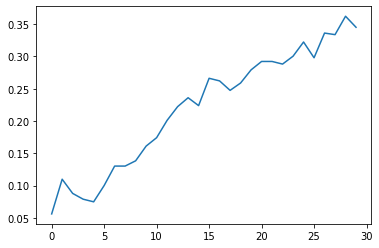

In [ ]:
plt.plot (history.history['accuracy'])
plt.show ()

LOSS PLOT FOR VGG16

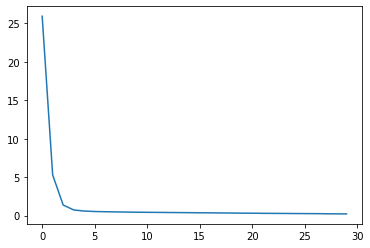

In [ ]:
plt.plot (history.history['loss'])
plt.show ()

In [ ]:
Y_preds=model_visual.predict(X_test)
print (Y_preds)

[[0.33935407 0.5562726  0.12419605 ... 0.16171023 0.10897262 0.08905084]
 [0.9359907  0.81895566 0.42309505 ... 0.13620557 0.01786631 0.01010424]
 [0.72594553 0.6554284  0.48922762 ... 0.14363192 0.05974807 0.0572685 ]
 ...
 [0.18098214 0.11079958 0.05281237 ... 0.11983512 0.25267738 0.33147708]
 [0.02398099 0.01054727 0.00176611 ... 0.02979014 0.04596116 0.13419233]
 [0.09953631 0.0327558  0.08472205 ... 0.15403013 0.07261425 0.06899721]]


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

!cp -r ./* /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot open './drive/MyDrive/njn-dwhx-tix - Oct 25, 2021.gjam' for reading: Operation not supported
cp: cannot create symbolic link '/content/drive/MyDrive/drive/MyDrive/graphic era': Operation not supported
cp: cannot open './drive/MyDrive/Project proposal (1).gdoc' for reading: Operation not supported
cp: cannot open './drive/MyDrive/Experiment No. 4_Telecom.gdoc' for reading: Operation not supported
cp: cannot open './drive/MyDrive/DSA PROJECT-converted.gdoc' for reading: Operation not supported
cp: cannot open './drive/MyDrive/NLDSprojKnightTraversal_synopsis.gdoc' for reading: Operation not supported
cp: cannot open './drive/MyDrive/Artificial_Intelligence_and_Machine_Learning_Course_Project_Report-2022-04-12-18-31.gdoc' for reading: Operation not supported
cp: cannot open './drive/MyDrive/ml project team 19 .gdoc' for reading: Operation not supporte

CONFUSION MATRIX FOR VGG16

In [ ]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix2 = confusion_matrix(np.argmax(Y_preds, axis=1), np.argmax(Y_test, axis=1))
print(cf_matrix2)

[[ 5  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  1  1  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  6  7  0  0  0  0  0  1  0  0  1  0  0  1  0  0]
 [ 7  4  2 37  7  6  2  2  0  3  0  3  0  0  1  1  0]
 [ 1  2  0  4  5  0  0  0  0  2  0  2  0  0  1  0  0]
 [35  4  6 19  8  9  2  0  0  1  0  1  1  0  1  0  0]
 [ 3  3  1  3  0  1  8  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  1 16  6  2  1  1  0  4  1  2  0  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  5  1  1  0  0  0  0  0  3  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  3  3  0  0  1  0  0  0  0  1  0  0  0  0  0]]


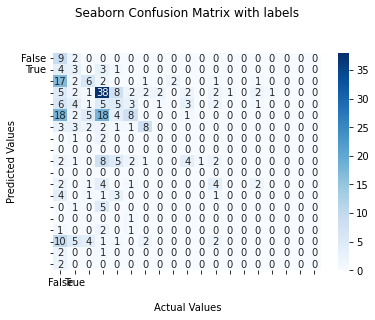

In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix2, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
f6=open('Genredict.pckl','rb')
Genre_ID_to_name=pickle.load(f6)
f6.close()

In [ ]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [ ]:
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(19):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print ("Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names))

Predicted:  Horror,Fantasy,Action  Actual:  Adventure,Fantasy,Action
Predicted:  Adventure,Family,Animation  Actual:  Adventure,Animation,Drama,Family
Predicted:  Drama,Science Fiction,Action  Actual:  Adventure,Action,Thriller
Predicted:  Action,Thriller,Horror  Actual:  Horror,Western
Predicted:  Action,Mystery,Thriller  Actual:  Documentary
Predicted:  Mystery,Horror,Thriller  Actual:  Animation,Horror,Comedy,Documentary,Music
Predicted:  Animation,History,Drama  Actual:  Drama,Romance,Foreign


In [ ]:
print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.47058823529411764 0.46190476190476193
